In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('tips.csv')

## Part 1

In [ ]:
numOfRows, numOfColumns = df.shape
columnNames = list(df.columns)
first5rows = df.head(5)
# Printing
print(numOfRows)
print(numOfColumns)
print(columnNames)
print(first5rows)

244
7
Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


## Part 2

In [4]:
numOfCustomersPerDay = df.day.value_counts().sort_values()
smokers_vs_nonsmokers = df.smoker.value_counts().sort_values()
groupSizeFrequencies = df['size'].value_counts().sort_values()

# Printing
print(numOfCustomersPerDay)
print(smokers_vs_nonsmokers)
print(groupSizeFrequencies)

day
Fri     19
Thur    62
Sun     76
Sat     87
Name: count, dtype: int64
smoker
Yes     93
No     151
Name: count, dtype: int64
size
1      4
6      4
5      5
4     37
3     38
2    156
Name: count, dtype: int64


## Part 3

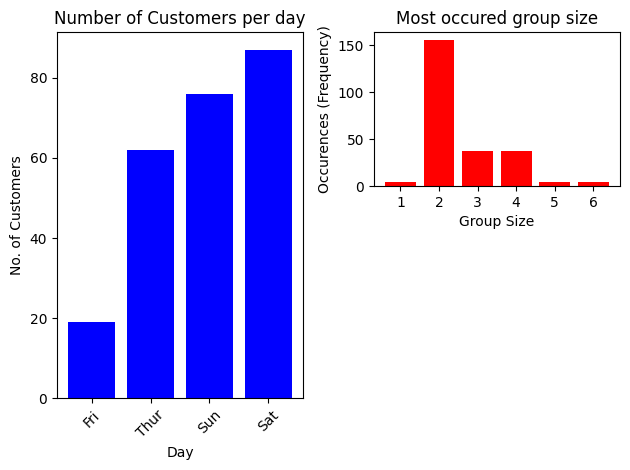

In [10]:

# type: ignore // to suppress pylance shit
#plt.figure(figsize=(3,3), dpi=200)

plt.subplot(1,2,1)
plt.bar(numOfCustomersPerDay.index, numOfCustomersPerDay.values, color='blue')
plt.xticks(numOfCustomersPerDay.index, rotation=45)
plt.xlabel('Day')
plt.ylabel('No. of Customers')
plt.title('Number of Customers per day')

plt.subplot(2,2,2)
plt.bar(groupSizeFrequencies.index, groupSizeFrequencies.values, color='red')
plt.xticks(groupSizeFrequencies.index)
plt.xlabel('Group Size')
plt.ylabel('Occurences (Frequency)')
plt.title('Most occured group size')

plt.tight_layout()
plt.show()

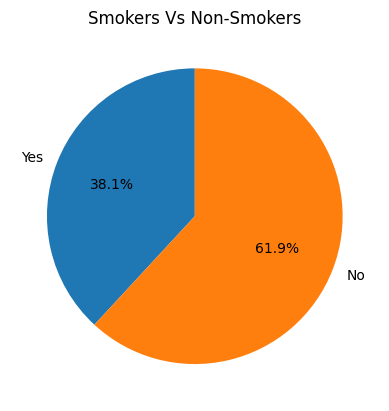

In [6]:
# type: ignore // to suppress pylance shit
#smokers_vs_nonsmokers['Yes'] = 'Smokers' idk why this didn't work
#smokers_vs_nonsmokers['No'] = 'Non-Smokers'
plt.pie(
    smokers_vs_nonsmokers.values,
    labels=smokers_vs_nonsmokers.index,
    startangle=90,
    autopct='%2.1f%%'
)
plt.title('Smokers Vs Non-Smokers')
plt.show()

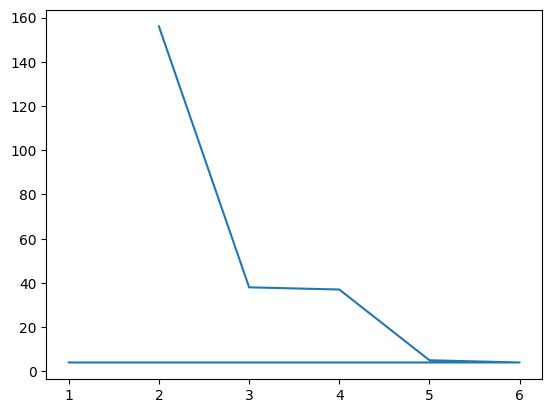

In [11]:
# type: ignore // to suppress pylance shit
plt.plot(groupSizeFrequencies.index, groupSizeFrequencies.values)
plt.title('')
plt.xticks(groupSizeFrequencies.index)
plt.show()

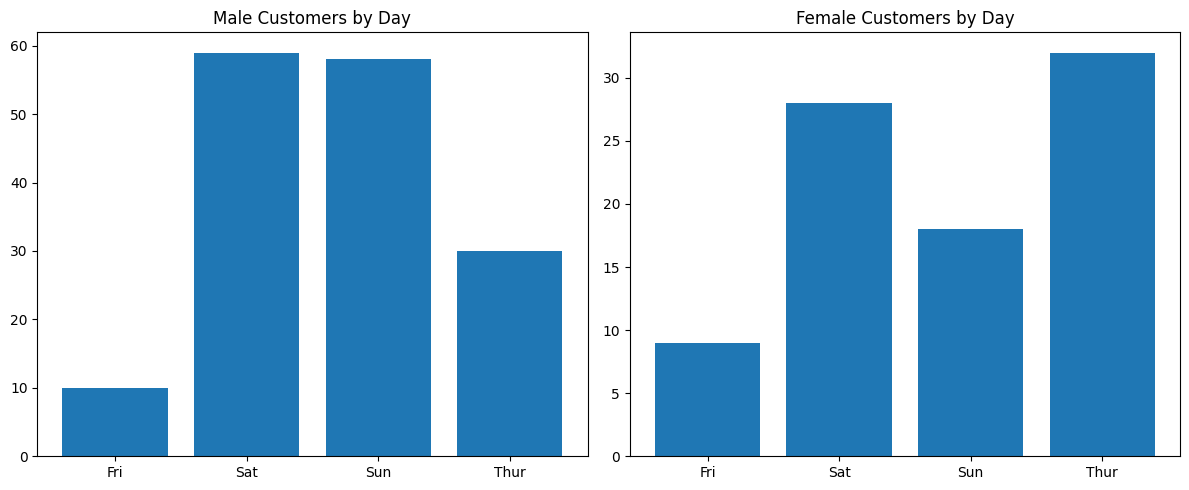

In [12]:
day_sex = df.groupby(['day', 'sex']).size().unstack()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.bar(day_sex.index, day_sex['Male'])
plt.title('Male Customers by Day')

plt.subplot(1,2,2)
plt.bar(day_sex.index, day_sex['Female'])
plt.title('Female Customers by Day')

plt.tight_layout()
plt.show()
